<a href="https://colab.research.google.com/github/gabrielcmerlin/testesDatasetMHealth/blob/main/modelosClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download

In [ ]:
!pip install tsai --quiet
!pip install sktime --quiet
!pip install pycatch22
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 830.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycatch22: filename=pycatch22-0.4.4-cp310-cp310-linux_x86_64.whl size=113405 sha256=c6a462483d5cd9dd1e0860aabba8a77bf7bdca1bc3b230ca930ece02e91d71a2
  Stored in directory: /root/.cache/pip/wheels/10/67/84/cdce1a956aa218fd5ce5b5fa6773219f42780b1fac77889c57
Successfully built pycatch22
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gdown
url = "https://drive.google.com/file/d/1OY9CzSx-r3gySVUCIpO36nRg8LW3OvMz/view?usp=sharing"
output = "Reader.py"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1OY9CzSx-r3gySVUCIpO36nRg8LW3OvMz
To: /content/Reader.py
100%|██████████| 1.03k/1.03k [00:00<00:00, 2.88MB/s]


'Reader.py'

In [ ]:
url = "https://drive.google.com/file/d/1Dm0uGXnRWEZwKe_R-_MCKY_hcM_RfIRd/view?usp=drive_link"
output = "dataset.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1Dm0uGXnRWEZwKe_R-_MCKY_hcM_RfIRd
To: /content/dataset.csv
100%|██████████| 2.96M/2.96M [00:00<00:00, 230MB/s]


'dataset.csv'

# Iniciando Ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Reader import Reader

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as snsa
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm.auto import tqdm

In [ ]:
import fastai
from fastai.callback.tracker import *
from tsai.all import *
from io import StringIO

In [ ]:
import pycatch22 as catch22
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dataset

In [ ]:
myReader = Reader()
ts, df = myReader.readFile("dataset.csv")

In [ ]:
df.head()

,SEXO,SKINCOLOR,ERITRÓCITOS [x10⁶/μL],HEMOGLOBINA [g/dL],HEMATÓCRITO [%],V.C.M. [fL],H.C.M. [pg],C.H.C.M. [g/dL],R.D.W. [%],LEUCÓCITOS [n°/mm³],...,ANTICORPO ANTI-La (SSB) [U/mL],CAPACIDADE DE FIXAÇÃO DO FERRO [µg/dL],ANTICORPO ANTI-ANTÍGENO DE SUPERFÍCIE DA HEPATITE B - (ANTI-HBsAg) [mUI/mL],ÁCIDO FÓLICO [ng/mL],BACILOSCOPIA PARA BAAR [campos],TESTOSTERONA TOTAL [ng/dL],TESTOSTERONA LIVRE [pg/mL],ESTRADIOL E2 [pg/mL],PROGESTERONA [ng/mL],CORTISOL [µg/dL]\n
0,F,B,3.95,11.6,35.0,89.0,29.0,33.0,14.3,2500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,B,3.80,12.4,37.0,98.0,33.0,33.0,14.2,5600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,B,4.90,15.3,45.0,92.0,31.0,34.0,14.2,4720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F,B,4.91,14.1,42.0,86.0,29.0,34.0,13.4,7660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['SEXO', 'SKINCOLOR', 'HEMOGLOBINA [g/dL]', 'LEUCÓCITOS [n°/mm³]', 'PLAQUETAS [n°/mm³]', 'ERITRÓCITOS [x10⁶/μL]']]

In [ ]:
df.head()

,SEXO,SKINCOLOR,HEMOGLOBINA [g/dL],LEUCÓCITOS [n°/mm³],PLAQUETAS [n°/mm³],ERITRÓCITOS [x10⁶/μL]
0,F,B,11.6,2500.0,286000.0,3.95
1,F,B,12.4,5600.0,151000.0,3.80
2,F,B,15.3,4720.0,164000.0,4.90
3,F,B,14.1,7660.0,240000.0,4.91
4,F,B,NaN,NaN,NaN,NaN


## Análise Inicial do dataset

In [ ]:
df["SEXO"].unique()

array(['F', 'M'], dtype=object)

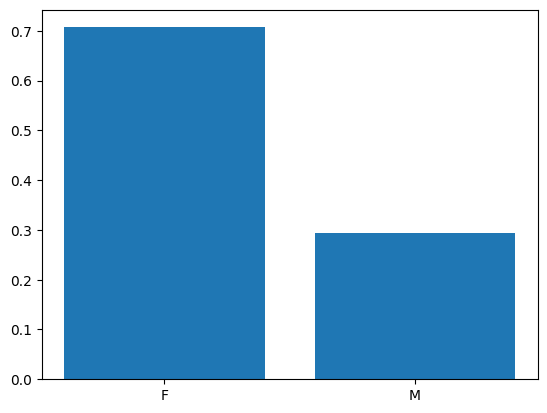

In [ ]:
F_count = (df["SEXO"] == "F").sum()
M_count = (df["SEXO"] == "M").sum()
plt.bar(df["SEXO"].unique(), np.array([F_count, M_count]) / (F_count + M_count))
plt.show()

In [ ]:
df["SKINCOLOR"].unique()

array(['B', 'N', 'P'], dtype=object)

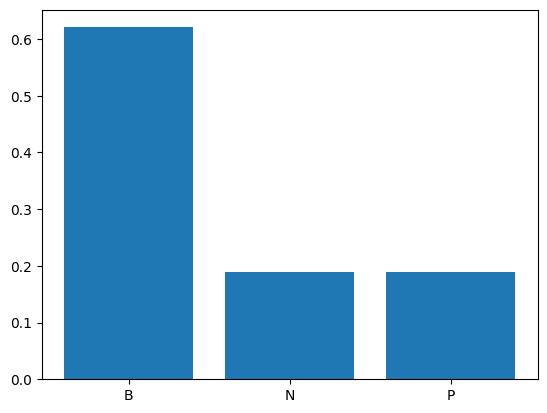

In [ ]:
B_count = (df["SKINCOLOR"] == "B").sum()
N_count = (df["SKINCOLOR"] == "N").sum()
P_count = (df["SKINCOLOR"] == "P").sum()
plt.bar(df["SKINCOLOR"].unique(), np.array([B_count, N_count, P_count]) / (B_count + N_count + P_count))
plt.show()

## Pré processamento

In [ ]:
print("HEMOGLOBINA: Temos {:.2f}% dos dados faltantes".format(df["HEMOGLOBINA [g/dL]"].isna().sum() * 100 / len(df)))
print("LEUCÓCITOS: Temos {:.2f}% dos dados faltantes".format(df["LEUCÓCITOS [n°/mm³]"].isna().sum() * 100 / len(df)))
print("PLAQUETAS: Temos {:.2f}% dos dados faltantes".format(df["PLAQUETAS [n°/mm³]"].isna().sum() * 100 / len(df)))
print("ERITRÓCITOS: Temos {:.2f}% dos dados faltantes".format(df["ERITRÓCITOS [x10⁶/μL]"].isna().sum() * 100 / len(df)))

HEMOGLOBINA: Temos 8.62% dos dados faltantes
LEUCÓCITOS: Temos 8.62% dos dados faltantes
PLAQUETAS: Temos 8.62% dos dados faltantes
ERITRÓCITOS: Temos 8.62% dos dados faltantes


In [ ]:
nan_rows = df.isna().any(axis=1)

In [ ]:
print(ts.shape)
ts = ts[~nan_rows]
print(ts.shape)

(58, 3, 900)
(53, 3, 900)


In [ ]:
df = df.dropna()

## Gerando Classes

In [ ]:
normal_hemo = (12, 16)
normal_leu = (4000, 10000)
normal_plaq = (150000, 450000)
normal_eri = (3.8, 5)

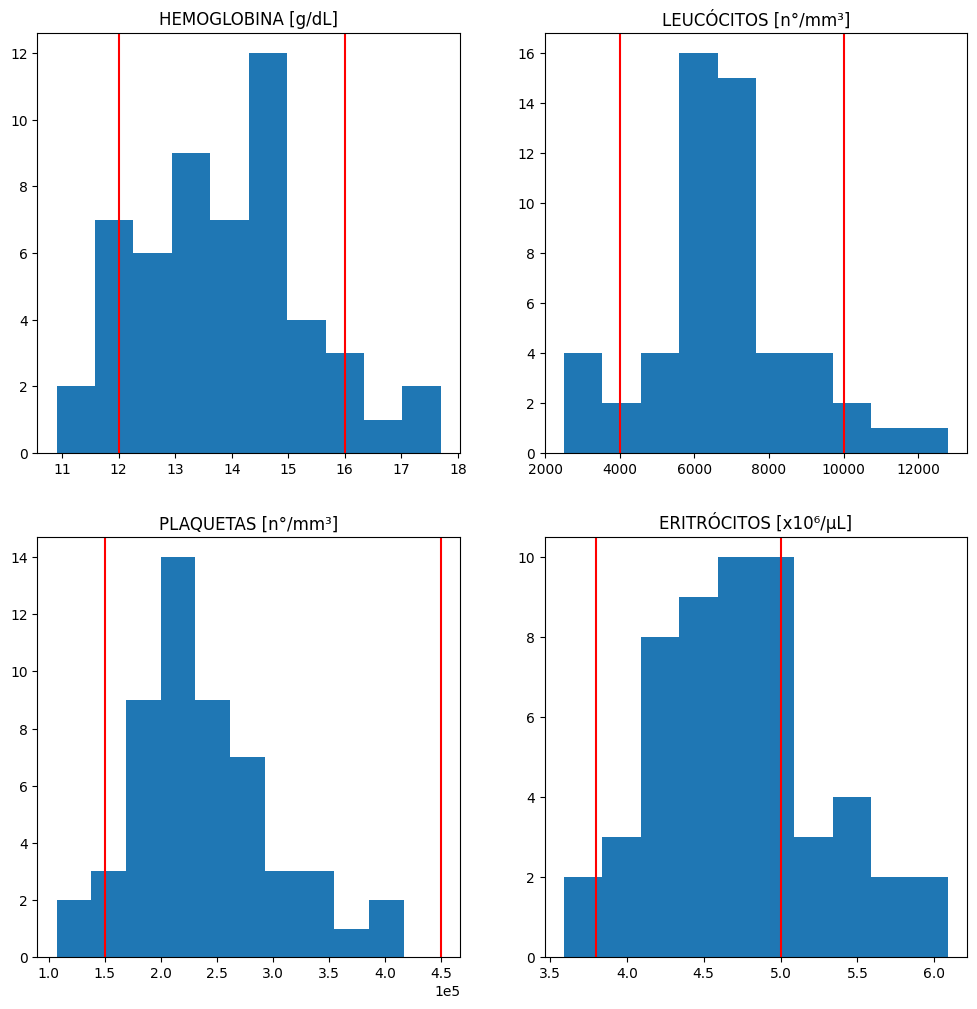

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].set_title('HEMOGLOBINA [g/dL]')
axs[0,0].hist(df["HEMOGLOBINA [g/dL]"])
axs[0,0].axvline(x = normal_hemo[0], color = 'r')
axs[0,0].axvline(x = normal_hemo[1], color = 'r')

axs[0,1].set_title('LEUCÓCITOS [n°/mm³]')
axs[0,1].hist(df["LEUCÓCITOS [n°/mm³]"])
axs[0,1].axvline(x = normal_leu[0], color = 'r')
axs[0,1].axvline(x = normal_leu[1], color = 'r')

axs[1,0].set_title('PLAQUETAS [n°/mm³]')
axs[1,0].hist(df["PLAQUETAS [n°/mm³]"])
axs[1,0].axvline(x = normal_plaq[0], color = 'r')
axs[1,0].axvline(x = normal_plaq[1], color = 'r')
axs[1,0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

axs[1,1].set_title("ERITRÓCITOS [x10⁶/μL]")
axs[1,1].hist(df["ERITRÓCITOS [x10⁶/μL]"])
axs[1,1].axvline(x = normal_eri[0], color = 'r')
axs[1,1].axvline(x = normal_eri[1], color = 'r')

fig.show()

- Não temos exemplos de número maior que o normal de plaquetas

In [ ]:
values2class_hemo = lambda x: (
    0 if (x < normal_hemo[0] or x > normal_hemo[1])
    else 1
)

values2class_leu = lambda x: (
    0 if (x < normal_leu[0] or x > normal_leu[1])
    else 2 if x > normal_leu[1]
    else 1
)

values2class_plaq = lambda x: (
    0 if (x < normal_plaq[0] or x > normal_plaq[1])
    else 1
)

values2class_eri = lambda x: (
    0 if (x < normal_eri[0] or x > normal_eri[1])
    else 1
)

In [ ]:
df['HEMOGLOBINA'] = df['HEMOGLOBINA [g/dL]'].apply(values2class_hemo)
df['LEUCÓCITOS'] = df['LEUCÓCITOS [n°/mm³]'].apply(values2class_leu)
df['PLAQUETAS'] = df['PLAQUETAS [n°/mm³]'].apply(values2class_plaq)
df['ERITRÓCITOS'] = df['ERITRÓCITOS [x10⁶/μL]'].apply(values2class_eri)

In [ ]:
df.head()

,SEXO,SKINCOLOR,HEMOGLOBINA [g/dL],LEUCÓCITOS [n°/mm³],PLAQUETAS [n°/mm³],ERITRÓCITOS [x10⁶/μL],HEMOGLOBINA,LEUCÓCITOS,PLAQUETAS,ERITRÓCITOS
0,F,B,11.6,2500.0,286000.0,3.95,0,0,1,1
1,F,B,12.4,5600.0,151000.0,3.80,1,1,1,1
2,F,B,15.3,4720.0,164000.0,4.90,1,1,1,1
3,F,B,14.1,7660.0,240000.0,4.91,1,1,1,1
5,F,B,13.4,6730.0,210000.0,4.58,1,1,1,1


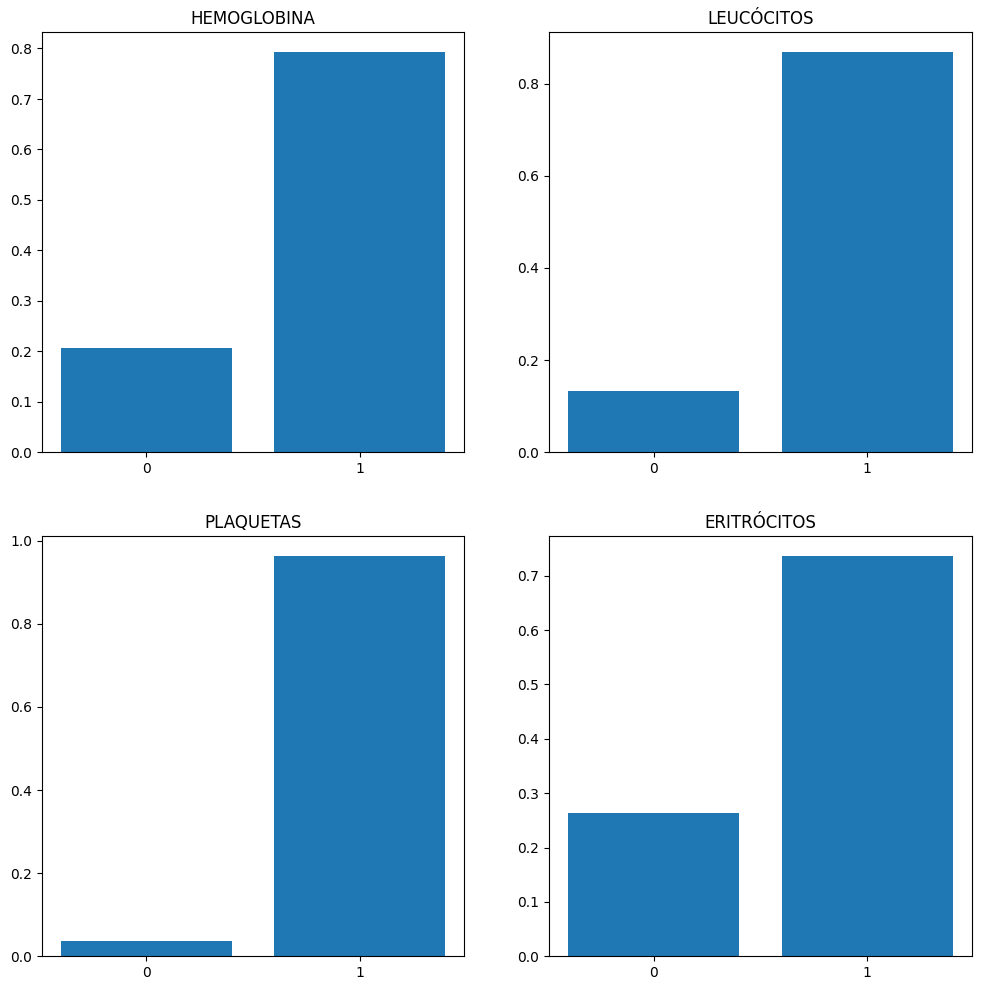

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

classes = ['0', '1']
n_rowns = len(df)

axs[0,0].set_title('HEMOGLOBINA')
hemo_valores = np.array([(df["HEMOGLOBINA"] == 0).sum(), (df["HEMOGLOBINA"] == 1).sum()])/n_rowns
axs[0,0].xticks = classes
axs[0,0].bar(classes, hemo_valores)

axs[0,1].set_title('LEUCÓCITOS')
leu_valores = np.array([(df["LEUCÓCITOS"] == 0).sum(), (df["LEUCÓCITOS"] == 1).sum()])/n_rowns
axs[0,1].xticks = classes
axs[0,1].bar(classes, leu_valores)

axs[1,0].set_title('PLAQUETAS')
plaq_valores = np.array([(df["PLAQUETAS"] == 0).sum(), (df["PLAQUETAS"] == 1).sum()])/n_rowns
axs[1,0].xticks = classes
axs[1,0].bar(classes, plaq_valores)

axs[1,1].set_title("ERITRÓCITOS")
eri_valores = np.array([(df["ERITRÓCITOS"] == 0).sum(), (df["ERITRÓCITOS"] == 1).sum()])/n_rowns
axs[1,1].xticks = classes
axs[1,1].bar(classes, eri_valores)

fig.show()

# Testes

In [ ]:
X = ts.copy()

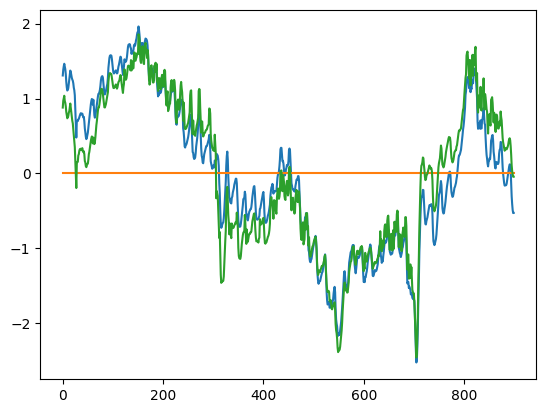

In [ ]:
plt.plot(np.swapaxes(X, 1, 2)[0])
plt.show()

## Features extraction

In [ ]:
catch22_output = catch22.catch22_all(ts[0][0,:])
fnames22 = catch22_output['names']

## Funções Auxiliares

In [ ]:
def plot_cm(learner, test_targets, test_preds):
  cm = np.zeros((len(learner.dls.vocab), len(learner.dls.vocab)), np.int64)
  for i, actual in enumerate(test_targets):
      cm[actual.item(), test_preds[i].item()] += 1

  fig = plt.figure()

  plt.imshow(cm, interpolation='nearest', cmap='Blues')
  plt.title("Confusion matrix")


  tick_marks = np.arange(len(learner.dls.vocab))
  plt.xticks(tick_marks, learner.dls.vocab, rotation=90)
  plt.yticks(tick_marks, learner.dls.vocab, rotation=0)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      coeff = f'{cm[i, j]}'
      plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white"
                  if cm[i, j] > thresh else "black")

  ax = fig.gca()
  ax.set_ylim(len(learner.dls.vocab)-.5,-.5)


  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.grid(False)

  plt.show()

In [ ]:
def train_rocket(X_train, y_train, X_test, y_test):
    cls = RocketClassifier()
    cls.fit(X_train, y_train)

    y_pred = cls.predict(X_test)

    return (y_test, y_pred)

## Avaliação

In [ ]:
def evaluate(target_name, test_size, valid_size, plot_metrics, plt_cm):

    y = np.array(df[target_name])

    # Criando um dicionário para guardar os resultados
    DL_models = ['InceptionTime', 'ResNet', 'FCN', 'Rocket']
    ML_models = ['xgboost', 'catboost', 'KNN', 'RandomForest']
    models = DL_models + ML_models

    metrics = ['Acc', 'F1']

    Results = {metric: {model: [] for model in models} for metric in metrics}

    # loop de testes, acontece 25 vezes
    for i in tqdm(range(25)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        splits = get_splits(y_train, valid_size=valid_size, shuffle=True, stratify=True, show_plot=False)

        tfms  = [None, [Categorize()]]
        dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)

        # gerando as features para os casos de treino
        X_train_features = np.array([catch22.catch22_all(X_train[i][0,:])['values'] for i in range(len(X_train))])
        X_train_Catch22 = pd.DataFrame(X_train_features, columns=fnames22)

        # gerando as features para os casos de teste
        X_test_features = np.array([catch22.catch22_all(X_test[i][0,:])['values'] for i in range(len(X_test))])
        X_test_Catch22 = pd.DataFrame(X_test_features, columns=fnames22)

        for model_name in models:
            if model_name in DL_models:
                if model_name == 'Rocket':
                    (test_targets, test_preds) = train_rocket(X_train, y_train, X_test, y_test)

                    Results['Acc']['Rocket'].append((test_targets == test_preds).mean())
                    Results['F1']['Rocket'].append(f1_score(test_targets, test_preds, average='macro'))
                else:

                    dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=16, batch_tfms=[TSStandardize()])

                    if(model_name == 'InceptionTime'):
                        model = InceptionTime(dls.vars, dls.c)
                    elif(model_name == 'ResNet'):
                        model = ResNet(dls.vars, dls.c)
                    else:
                        model = FCN(dls.vars, dls.c)

                    learn = Learner(dls, model, metrics=accuracy)

                    # usados para evitar verbose
                    original_stdout = sys.stdout
                    sys.stdout = StringIO()

                    with learn.no_bar(), learn.no_logging(): learn.fit_one_cycle(100, lr_max=1e-4, cbs=[SaveModelCallback(monitor='valid_loss', min_delta=0.0001)]);

                    sys.stdout = original_stdout

                    if(plot_metrics):
                        learn.recorder.plot_metrics()

                    dls = learn.dls
                    valid_dl = dls.valid

                    test_ds = valid_dl.dataset.add_test(X_test, y_test)
                    test_dl = valid_dl.new(test_ds)

                    next(iter(test_dl));

                    test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)

                    Results['Acc'][model_name].append((test_targets == test_preds).float().mean().item())
                    Results['F1'][model_name].append(f1_score(test_targets, test_preds, average='macro'))

                if(plt_cm):
                    plot_cm(learn, test_targets, test_preds)

            else:

                if(model_name == 'xgboost'):
                    model = XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=3, n_estimators= 46, eval_metric='logloss')
                elif(model_name == 'catboost'):
                    model = CatBoostClassifier(iterations=250, learning_rate=1e-1, depth=8, loss_function='CrossEntropy')
                elif(model_name == 'KNN'):
                    model = KNeighborsClassifier(n_neighbors= 3, p= 2, weights= 'uniform')
                else:
                    model = RandomForestClassifier(n_estimators = 50)

                if(model_name in ['xgboost', 'catboost']):
                    model.fit(X_train_Catch22, y_train, verbose=False)
                else:
                    model.fit(X_train_Catch22, y_train,)

                y_pred = model.predict(X_test_Catch22)

                Results['Acc'][model_name].append((y_test == y_pred).mean())
                Results['F1'][model_name].append(f1_score(y_test, y_pred, average='macro'))

                if(plt_cm):
                    confusion_mat = confusion_matrix(X_test_Catch22, preds)
                    plt.figure(figsize=(8, 6))
                    sns.heatmap(confusion_mat, fmt='d', annot=True, cmap='Blues', cbar=False)
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.title('Confusion Matrix')
                    plt.show()


    print(f'---{target_name}----')
    print(f"Inception Time: Acc:{np.mean(Results['Acc']['InceptionTime'])} F1:{np.mean(Results['F1']['InceptionTime'])}")
    print(f"ResNet: Acc:{np.mean(Results['Acc']['ResNet'])} F1:{np.mean(Results['F1']['ResNet'])}")
    print(f"FCN: Acc:{np.mean(Results['Acc']['FCN'])} F1:{np.mean(Results['F1']['FCN'])}")
    print(f"Rocket: Acc:{np.mean(Results['Acc']['Rocket'])} F1:{np.mean(Results['F1']['Rocket'])}")
    print(f"xgboost: Acc:{np.mean(Results['Acc']['xgboost'])} F1:{np.mean(Results['F1']['xgboost'])}")
    print(f"catboost: Acc:{np.mean(Results['Acc']['catboost'])} F1:{np.mean(Results['F1']['catboost'])}")
    print(f"KNN: Acc:{np.mean(Results['Acc']['KNN'])} F1:{np.mean(Results['F1']['KNN'])}")
    print(f"RandomForest: Acc:{np.mean(Results['Acc']['RandomForest'])} F1:{np.mean(Results['F1']['RandomForest'])}")
    print('---------------------')


In [ ]:
evaluate('HEMOGLOBINA', 0.1, 0.12, plot_metrics=False, plt_cm=False)
evaluate('LEUCÓCITOS', 0.1, 0.12, plot_metrics=False, plt_cm=False)
evaluate('PLAQUETAS', 0.1, 0.12, plot_metrics=False, plt_cm=False)
evaluate('ERITRÓCITOS', 0.1, 0.12, plot_metrics=False, plt_cm=False)

  0%|          | 0/25 [00:00<?, ?it/s]

---HEMOGLOBINA----
Inception Time: Acc:0.6800000023841858 F1:0.43793939393939396
ResNet: Acc:0.72 F1:0.46763636363636363
FCN: Acc:0.7800000023841858 F1:0.553939393939394
Rocket: Acc:0.6866666666666665 F1:0.47340836940836944
xgboost: Acc:0.8666666666666667 F1:0.7028989898989899
catboost: Acc:0.82 F1:0.6180808080808081
KNN: Acc:0.7533333333333333 F1:0.49971717171717167
RandomForest: Acc:0.8066666666666668 F1:0.5760808080808081
---------------------


  0%|          | 0/25 [00:00<?, ?it/s]

---LEUCÓCITOS----
Inception Time: Acc:0.8666666603088379 F1:0.6613333333333332
ResNet: Acc:0.8866666626930236 F1:0.7076363636363635
FCN: Acc:0.8733333277702332 F1:0.6639999999999999
Rocket: Acc:0.8200000000000002 F1:0.5861818181818181
xgboost: Acc:0.8666666666666667 F1:0.6421818181818182
catboost: Acc:0.8666666666666667 F1:0.6938989898989899
KNN: Acc:0.8733333333333334 F1:0.664
RandomForest: Acc:0.9000000000000001 F1:0.7316363636363635
---------------------


  0%|          | 0/25 [00:00<?, ?it/s]

---PLAQUETAS----
Inception Time: Acc:0.9599999952316284 F1:0.869090909090909
ResNet: Acc:0.9599999952316284 F1:0.869090909090909
FCN: Acc:0.9599999952316284 F1:0.869090909090909
Rocket: Acc:0.96 F1:0.869090909090909
xgboost: Acc:0.96 F1:0.869090909090909
catboost: Acc:0.96 F1:0.869090909090909
KNN: Acc:0.96 F1:0.869090909090909
RandomForest: Acc:0.96 F1:0.869090909090909
---------------------


  0%|          | 0/25 [00:00<?, ?it/s]

---ERITRÓCITOS----
Inception Time: Acc:0.6866666662693024 F1:0.5052972582972584
ResNet: Acc:0.6266666692495346 F1:0.4477186147186147
FCN: Acc:0.6133333373069764 F1:0.43515584415584413
Rocket: Acc:0.62 F1:0.4569740259740259
xgboost: Acc:0.6533333333333333 F1:0.4243910533910535
catboost: Acc:0.72 F1:0.5121212121212121
KNN: Acc:0.6066666666666667 F1:0.4199264069264069
RandomForest: Acc:0.7266666666666667 F1:0.578933621933622
---------------------
